# julia Set - Desenvolvimento
Neste notebook será apresentado um comparativo de paralisação de algoritmos, espec vende o Júlia set. Abaixa, será apresentado o gráfico de tempo de execução, bem o teste de spdate para cada uma das execuções. Para mais informações acerca do funcionamento deixa algoritmo, observe o pdf em anexo nesse mesmo diretório.

Execute a célula abaixo para criar os arquivos que armazenarão os tempos de execução para: Open MP, CUDA, serial.

In [228]:
!echo "size_img,real_time" > tempo_JF.csv 
!echo "size_img,real_time" > tempo_JF-cuda.csv 
!echo "size_img,real_time" > tempo_JF-openMP.csv 


In [245]:
#Execução multipla com alteração do tamanho da imagem
!make build_all;\
for img in {100,500,1000,5000,10000};do\
    export IMG_SIZE=$img;  \
    echo size_img: $img; \
    for plt in {'JF','JF-cuda','JF-openMP'};do\
        echo Executando: $plt ;\
        env time --append --format "$img,%e" \
            --output tempo_$plt.csv \
            ./$plt $img; \
        done;\
    done &&\
!clear;\
echo Benchmark finalizado!
!make clean!

nvcc -o JF-cuda JF-cuda.cu
g++ -o JF-openMP -O3 -Werror -fopenmp -DOPENMP -DIM JF-openMP.cpp
g++ -o JF -O3 -Werror -DSERIAL JF.cpp
Building Completed
size_img: 100
Executando: JF
Execucao openMP:
	size=100
Image saved: julia_serial.pgm
Executando: JF-cuda
Execucao CUDA:
	size=100
Image saved: julia_cuda.pgm
Executando: JF-openMP
Execucao openMP:
	size=100
Image saved: julia_omp.pgm
size_img: 500
Executando: JF
Execucao openMP:
	size=500
Image saved: julia_serial.pgm
Executando: JF-cuda
Execucao CUDA:
	size=500
Image saved: julia_cuda.pgm
Executando: JF-openMP
Execucao openMP:
	size=500
Image saved: julia_omp.pgm
size_img: 1000
Executando: JF
Execucao openMP:
	size=1000
Image saved: julia_serial.pgm
Executando: JF-cuda
Execucao CUDA:
	size=1000
Image saved: julia_cuda.pgm
Executando: JF-openMP
Execucao openMP:
	size=1000
Image saved: julia_omp.pgm
size_img: 5000
Executando: JF
Execucao openMP:
	size=5000
Image saved: julia_serial.pgm
Executando: JF-cuda
Execucao CUDA:
	size=5000
Image s

# Apresentação dos resultados

/tmp/ipykernel_27946/2736428414.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, group) in enumerate(groups):
/home/mbgustav/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1180: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/mbgustav/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1181: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


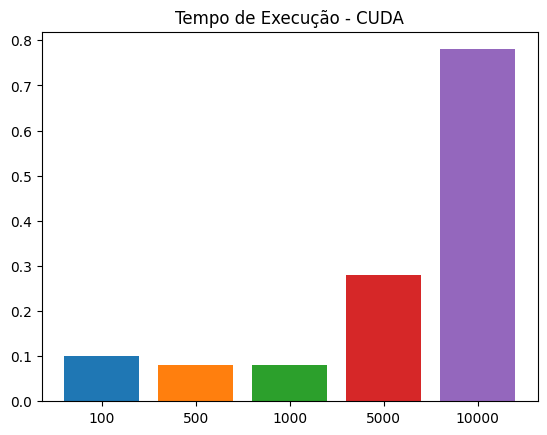

/tmp/ipykernel_27946/2736428414.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, group) in enumerate(groups):
/home/mbgustav/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1180: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/mbgustav/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1181: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


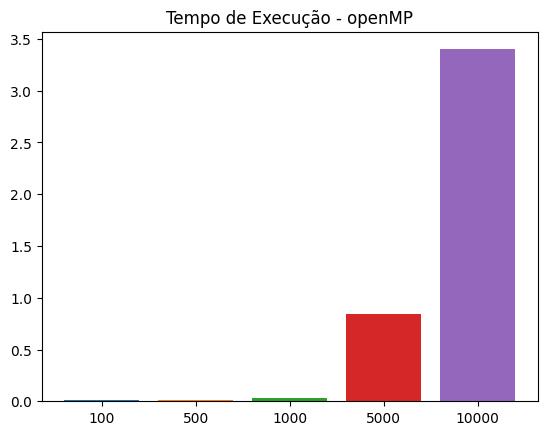

/tmp/ipykernel_27946/2736428414.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, group) in enumerate(groups):
/home/mbgustav/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1180: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/mbgustav/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1181: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


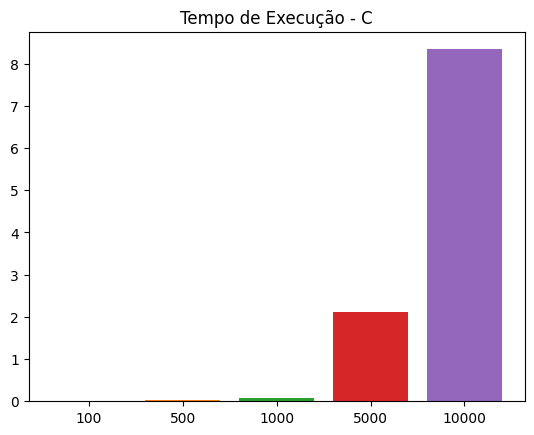

In [243]:
import os
import pandas as pd

def print_grafico(FNAME, titulo):
    df = pd.read_csv(FNAME)
    groups = df.groupby(['size_img'])
    fig, ax = plt.subplots()
    x_positions = list(range(len(groups)))
    heights = []
    stds = []
    for i, (name, group) in enumerate(groups):
        heights.append(group['real_time'].mean())
        stds.append(group['real_time'].std())
        ax.bar(i, group['real_time'].mean(), yerr=group['real_time'].std(), align='center')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df['size_img'].unique())
    plt.title(titulo)
    plt.show()
print_grafico('tempo_JF-cuda.csv', 'Tempo de Execução - CUDA')
print_grafico('tempo_JF-openMP.csv', 'Tempo de Execução - openMP')
print_grafico('tempo_JF.csv', 'Tempo de Execução - C')


